In [342]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks', {"axes.linewidth": "1",'axes.yaxis.grid':False})
current_palette = sns.color_palette()

In [506]:
import numpy as np

In [507]:
figoutpath = 'assignment_1/part3/task3/figures'

## Total run time

In [466]:
labels = ['disk', 'memory', 'memory + disk']

# Execution times for the small (Berkeley-Stanford) and large (wiki) datasets
# Note we're using execution time to refer to the run time of the 10 iterations only.
small_execution_times = [499-6, 141-8, 147-9]  # in seconds
large_execution_times = [4265-208, 4368-247, 4341-273]  # in seconds

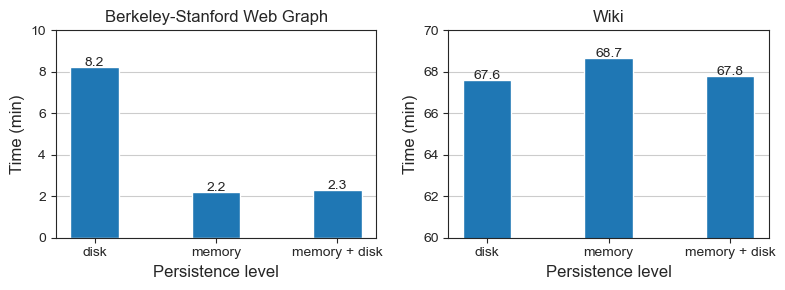

In [517]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
width = 0.4  # width of a bar 

cols = ['#ff00aa', '#00aaff']
bars1 = ax[0].bar(range(len(labels)), [x/60 for x in small_execution_times], width=width, color=current_palette[0], label='Berkeley-Stanford')
bars2 = ax[1].bar([x+width for x in list(range(len(labels)))], [x/60 for x in large_execution_times], width=width, color=current_palette[0], label='Wiki')

ax[0].set_ylim(0, 10)
ax[1].set_ylim(60, 70)

ax[0].set_ylabel('Time (min)', fontsize=12)
ax[1].set_ylabel('Time (min)', fontsize=12)
ax[0].set_xlabel('Persistence level', fontsize=12)
ax[1].set_xlabel('Persistence level', fontsize=12)

ax[0].set_xticks([x for x in range(len(labels))])
ax[0].set_xticklabels(labels, fontsize=10)
ax[1].set_xticks([x+width for x in range(len(labels))])
ax[1].set_xticklabels(labels, fontsize=10)

for bar in bars1:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + width/2, yval + .05, f'{yval:.1f}', horizontalalignment='center', fontsize=10)
for bar in bars2:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + width/2, yval + .05, f'{yval:.1f}', horizontalalignment='center', fontsize=10)

ax[0].set_title('Berkeley-Stanford Web Graph')
ax[1].set_title('Wiki')

ax[0].yaxis.grid()
ax[1].yaxis.grid()
fig.tight_layout()
fig.savefig(f'{figoutpath}/execution_time.png')
plt.show()

###  Time per iteration

In [508]:
# Each iteration has two stages, join and fullOuterJoin. We count iteration time as the sum of these two stages.
# Besides these two, the other two main stages are count and groupByKey (for reading input) and runJob (for saving output).

disk_join_time_per_iteration_s = [36, 164, 163, 155, 159, 163, 171, 181, 193, 207]
disk_fullOuterJoin_time_per_iteration_s = [394, 224, 225, 223, 224, 228, 230, 233, 238, 244]
memory_join_time_per_iteration_s = [51, 166, 167, 158, 162, 163, 171, 181, 192, 207]
memory_fullOuterJoin_time_per_iteration_s = [411, 227, 227, 225, 247, 226, 229, 232, 240, 249]
memory_disk_join_time_per_iteration_s = [36, 161, 162, 154, 159, 163, 170, 180, 191, 209]
memory_disk_fullOuterJoin_time_per_iteration_s = [402, 228, 226, 223, 226, 227, 231, 232, 239, 248]

disk_time_per_iteration_s = [sum(x) for x in zip(disk_join_time_per_iteration_s, disk_fullOuterJoin_time_per_iteration_s)]
memory_time_per_iteration_s = [sum(x) for x in zip(memory_join_time_per_iteration_s, memory_fullOuterJoin_time_per_iteration_s)]
memory_disk_time_per_iteration_s = [sum(x) for x in zip(memory_disk_join_time_per_iteration_s, memory_disk_fullOuterJoin_time_per_iteration_s)]

disk_runJob_time_s = 208
memory_runJob_time_s = 247
memory_disk_runJob_time_s = 273

disk_countJob_time_s = 145
memory_countJob_time_s = 187
memory_disk_countJob_time_s = 189

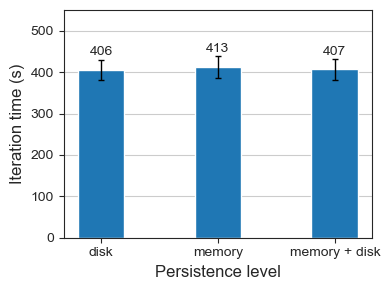

In [515]:
fig, ax = plt.subplots(1,1,figsize=(4,3))
width = 0.4  # width of a bar

y = [sum(x)/len(x) for x in [disk_time_per_iteration_s, memory_time_per_iteration_s, memory_disk_time_per_iteration_s]]
yerr = [np.std(x) for x in [disk_time_per_iteration_s, memory_time_per_iteration_s, memory_disk_time_per_iteration_s]]

bars = ax.bar(range(len(labels)), y, yerr=yerr, width=width, color=current_palette[0], label='Wiki',
              error_kw={'elinewidth': 1, 'capthick': 1, 'capsize': 2})
ax.set_ylim(0, 550)

ax.set_xticks([x for x in range(len(labels))])
ax.set_xticklabels(labels, fontsize=10)

ax.set_ylabel('Iteration time (s)', fontsize=12)
ax.set_xlabel('Persistence level', fontsize=12)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + width/2, yval + 35, f'{yval:.0f}', horizontalalignment='center', fontsize=10,)

ax.yaxis.grid()
fig.tight_layout()
fig.savefig(f'{figoutpath}/iteration_time-wiki.pdf')
plt.show()

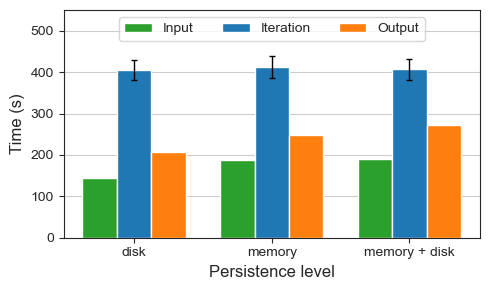

In [516]:
fig, ax = plt.subplots(1,1,figsize=(5,3))

iteration_mean = y
iteration_std = yerr

input_time = [disk_countJob_time_s, memory_countJob_time_s, memory_disk_countJob_time_s]
output_time = [disk_runJob_time_s, memory_runJob_time_s, memory_disk_runJob_time_s]

ind = np.arange(len(iteration_mean))  # the x locations for the groups
width = 0.25  # width of a bar

bars1 = ax.bar(ind - width, input_time, width,
                label='Input', color=current_palette[2])
bars2 = ax.bar(ind, iteration_mean, width, yerr=iteration_std, error_kw={'elinewidth': 1, 'capthick': 1, 'capsize': 2},
                label='Iteration', color=current_palette[0])
bars3 = ax.bar(ind + width, output_time, width,
                label='Output', color=current_palette[1])
ax.set_ylim(0, 550)

ax.set_ylabel('Time (s)', fontsize=12)
ax.set_xlabel('Persistence level', fontsize=12)

ax.set_xticks([x for x in range(len(labels))])
ax.set_xticklabels(labels, fontsize=10)

plt.legend(fontsize=10, loc='upper center', ncol=3)

ax.yaxis.grid()
fig.tight_layout()
fig.savefig(f'{figoutpath}/time_breakdown_by_job-wiki.pdf')
plt.show()
